<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001_DL_Lab_Implementation_of_the_AlexNet_Model_with_the_CIFAR_dataset_Activity_1_Asgn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DL-Lab-CSE6037_Lab-Assignment-3_Activity-1_Implementation_of_the_AlexNet_Model_with_the_CIFAR-dataset

Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link :   


https://github.com/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001_DL_Lab_Implementation_of_the_AlexNet_Model_with_the_CIFAR_dataset_Activity_1_Asgn_3.ipynb

In [254]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [255]:
np.random.seed(1000)

Developing / Creating the AlexNet Model and adding the Convolution Layers

In [256]:
#Instantiation
AlexNet = Sequential()

In [257]:
#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [258]:
#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))


In [259]:
#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

In [260]:
#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

In [261]:
#Model Summary
AlexNet.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_54 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_54 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_55 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_55 (Activation)   (None, 4, 4, 256)        

To Compile the AlexNet Model

In [262]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

In [263]:
#save the trained model to a file so that it can be used to make predictions later :
AlexNet.save("alnet_model.h5")

To Display the first convolution function kernel filter coefficient values (for 25 images)


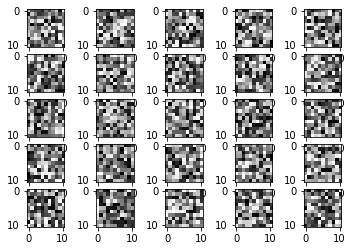

In [264]:
x1w = AlexNet.get_weights()[0][:,:,0,:]

for i in range(1,26):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

To Load the CIFAR dataset from Keras :

In [265]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

In [266]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()


To Train-validate-test split the CIFAR dataset on the Model :

In [267]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=10)

In [268]:
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)


train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

#Learning Rate 
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(   monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5)

To Display Sample Input Images :

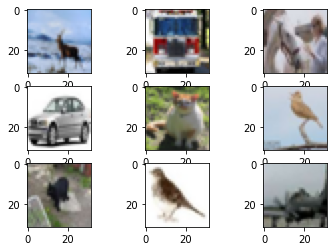

In [269]:
from matplotlib import pyplot
subplots = []
rows = 3
cols = 3
for i in range(9):
	# define subplot
	pyplot.subplot(rows, cols, i+1)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

To Display Sample Output Images :

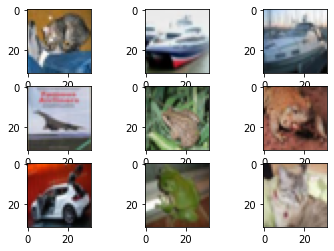

In [270]:
from matplotlib import pyplot
subplots = []
rows1 = 3
cols1 = 3
for i1 in range(9):
	# define subplot
	pyplot.subplot(rows1, cols1, i1+1)
	# plot raw pixel data
	pyplot.imshow(x_test[i1])
# show the figure
pyplot.show()

To Display the total images in the CIFAR dataset :

In [271]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(35000, 10)
(10000, 10)
(15000, 10)


To Display the size of the Images in the CIFAR dataset :

In [272]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((35000, 32, 32, 3), (35000, 10))
((10000, 32, 32, 3), (10000, 10))
((15000, 32, 32, 3), (15000, 10))


To Display the no of classes in the CIFAR dataset :

In [273]:
Labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [274]:
Labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

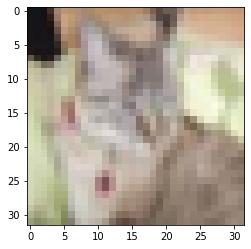

Label :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [275]:
import matplotlib.pyplot as plt
plt.imshow(x_test[8])
plt.show()

print("Label : ", y_test[8])

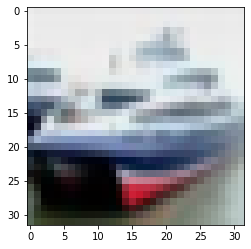

Label :   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [276]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])
plt.show()

print("Label :  ", y_test[1])

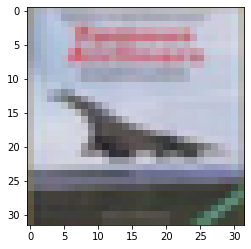

Label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [277]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3])
plt.show()

print("Label :", y_test[3])

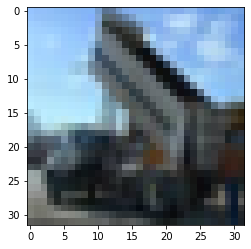

Label :   [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [278]:
import matplotlib.pyplot as plt
plt.imshow(x_test[50])
plt.show()

print("Label :  ", y_test[50])

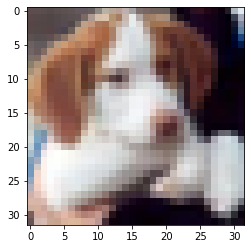

Label :   [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [279]:
import matplotlib.pyplot as plt
plt.imshow(x_test[16])
plt.show()

print("Label :  ", y_test[16])

To Train the AlexNet Model :

In [280]:
#Defining the parameters
batch_size= 30
epochs=10
learn_rate=.001

In [281]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

Epoch 1/10
1166/1166 [==============================] - 27s 22ms/step - loss: 1.8277 - accuracy: 0.3335 - val_loss: 1.7384 - val_accuracy: 0.3745
Epoch 2/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.4977 - accuracy: 0.4660 - val_loss: 1.4307 - val_accuracy: 0.4876
Epoch 3/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.3774 - accuracy: 0.5065 - val_loss: 1.8928 - val_accuracy: 0.3560
Epoch 4/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.3049 - accuracy: 0.5353 - val_loss: 1.8023 - val_accuracy: 0.3664
Epoch 5/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.2304 - accuracy: 0.5695 - val_loss: 1.5379 - val_accuracy: 0.4799
Epoch 6/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.1574 - accuracy: 0.5939 - val_loss: 1.2358 - val_accuracy: 0.5641
Epoch 7/10
1166/1166 [==============================] - 25s 22ms/step - loss: 1.1072 - accuracy: 0.6112 - val_loss: 1.9910 -

In [282]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

#To Display Training Accuracy and  Training Error :

Confusion matrix, without normalization


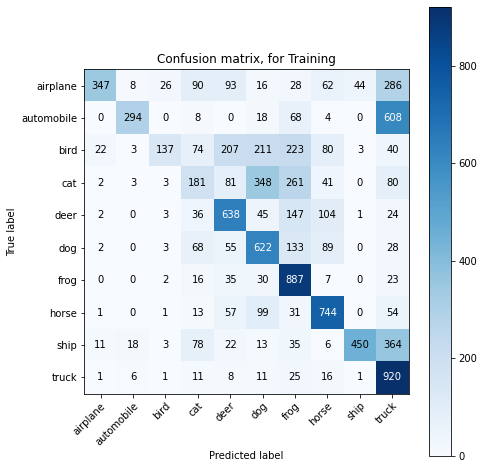

In [283]:
#Making prediction for the Training data
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, for Training')

In [284]:
# Training accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Training Accuracy  = ', acc_score)

Training Accuracy  =  0.522


In [285]:
#Training Error
print('Training Error  = ', (1-acc_score))

Training Error  =  0.478


#To Display Testing Accuracy and Testing Error :

Normalized confusion matrix


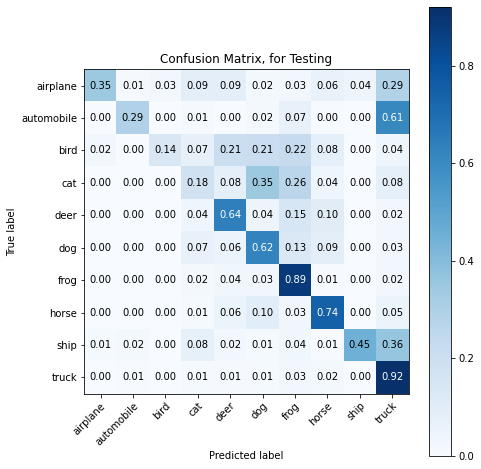

In [286]:
#Making prediction for the Testing data
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting  confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True, title='Confusion Matrix, for Testing')

In [287]:
# Testing accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Testing Accuracy  = ', acc_score)

Testing Accuracy  =  0.522


In [288]:
#Testing Error
print('Testing Error  = ', (1-acc_score))

Testing Error  =  0.478
